In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DS projects/Churn Prediction/Telco-Customer-Churn.csv')

# MonthlyCharges column is float, but TotalCharges column is object.
# Converting the Total Charges column to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

#Removing missing values
df.dropna(how = 'any', inplace = True)
# Since the % of these records compared to total dataset is very low ie 0.15%,
# it is safe to ignore them from further processing.

# Create a new column called tenure group.
# Then divide customers into bins based on tenure
# e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

df['tenure_group'] = pd.cut(df['tenure'],
                           bins = [0, 12, 24, 36, 48, 60, 72],
                           labels =[1,2,3,4,5,6])


In [ ]:
# Create a new dataframe called df_updated.
# transform the Churn column - No: 0, Yes: 1
# Use the preprocessor transformer to every column apart from Churn column.

df_updated = df.copy()

# Transform Churn column
df_updated['Churn'] = df_updated['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate features and target
X = df_updated.drop(columns=['Churn', 'customerID','tenure'], axis=1)  # Exclude customerID as it's not a feature
y = df_updated['Churn']

# Identify categorical and numerical features (excluding 'Churn' and 'customerID')
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((5274, 19), (1758, 19))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()
OHE_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", OHE_transformer, categorical_features),
          ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')),
                                ('StandardScaler', MinMaxScaler(),
                                 Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure_group'], dtype='object'))])

In [ ]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((5274, 30), (1758, 30))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
rocauc_scores = []

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    accuracy_scores.append(model_test_accuracy)
    f1_scores.append(model_test_f1)
    precision_scores.append(model_test_precision)
    recall_scores.append(model_test_recall)
    rocauc_scores.append(model_test_rocauc_score)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8030
- F1 score: 0.7977
- Precision: 0.6550
- Recall: 0.5571
- Roc Auc Score: 0.7249
----------------------------------
Model performance for Test set
- Accuracy: 0.7918
- F1 score: 0.7853
- Precision: 0.6204
- Recall: 0.5175
- Roc Auc Score: 0.7030


Decision Tree
Model performance for Training set
- Accuracy: 0.9983
- F1 score: 0.9983
- Precision: 0.9993
- Recall: 0.9943
- Roc Auc Score: 0.9970
----------------------------------
Model performance for Test set
- Accuracy: 0.7292
- F1 score: 0.7302
- Precision: 0.4808
- Recall: 0.4913
- Roc Auc Score: 0.6522


Random Forest
Model performance for Training set
- Accuracy: 0.9983
- F1 score: 0.9983
- Precision: 0.9965
- Recall: 0.9972
- Roc Auc Score: 0.9979
----------------------------------
Model performance for Test set
- Accuracy: 0.7787
- F1 score: 0.7680
- Precision: 0.5994
- Recall: 0.4541
- Roc Auc Score: 0.6736


Gradient Boost
Model performance for Training se

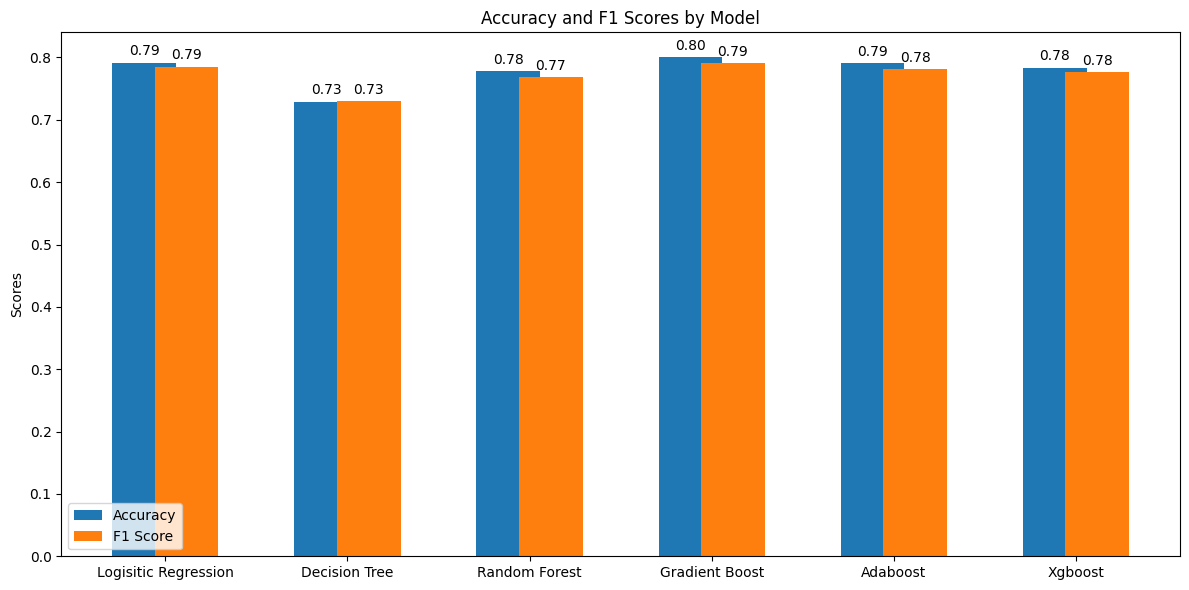

In [ ]:
model_names = list(models.keys())

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/3, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/3, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='{:.2f}')
ax.bar_label(rects2, padding=3, fmt='{:.2f}')

fig.tight_layout()

plt.show()

**Handling Imbalance**

In [ ]:
# Handling class imbalance with smote
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

len(X_train_resample), len(y_train_resample)

(7726, 7726)

In [ ]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
rocauc_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_resample, y_train_resample) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_resample)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_resample, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_resample, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_resample, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_resample, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_resample, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    accuracy_scores.append(model_test_accuracy)
    f1_scores.append(model_test_f1)
    precision_scores.append(model_test_precision)
    recall_scores.append(model_test_recall)
    rocauc_scores.append(model_test_rocauc_score)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7787
- F1 score: 0.7784
- Precision: 0.7616
- Recall: 0.8113
- Roc Auc Score: 0.7787
----------------------------------
Model performance for Test set
- Accuracy: 0.7418
- F1 score: 0.7555
- Precision: 0.5029
- Recall: 0.7686
- Roc Auc Score: 0.7504


Decision Tree
Model performance for Training set
- Accuracy: 0.9988
- F1 score: 0.9988
- Precision: 0.9997
- Recall: 0.9979
- Roc Auc Score: 0.9988
----------------------------------
Model performance for Test set
- Accuracy: 0.7355
- F1 score: 0.7377
- Precision: 0.4928
- Recall: 0.5197
- Roc Auc Score: 0.6656


Random Forest
Model performance for Training set
- Accuracy: 0.9988
- F1 score: 0.9988
- Precision: 0.9984
- Recall: 0.9992
- Roc Auc Score: 0.9988
----------------------------------
Model performance for Test set
- Accuracy: 0.7651
- F1 score: 0.7650
- Precision: 0.5492
- Recall: 0.5480
- Roc Auc Score: 0.6948


Gradient Boost
Model performance for Training se

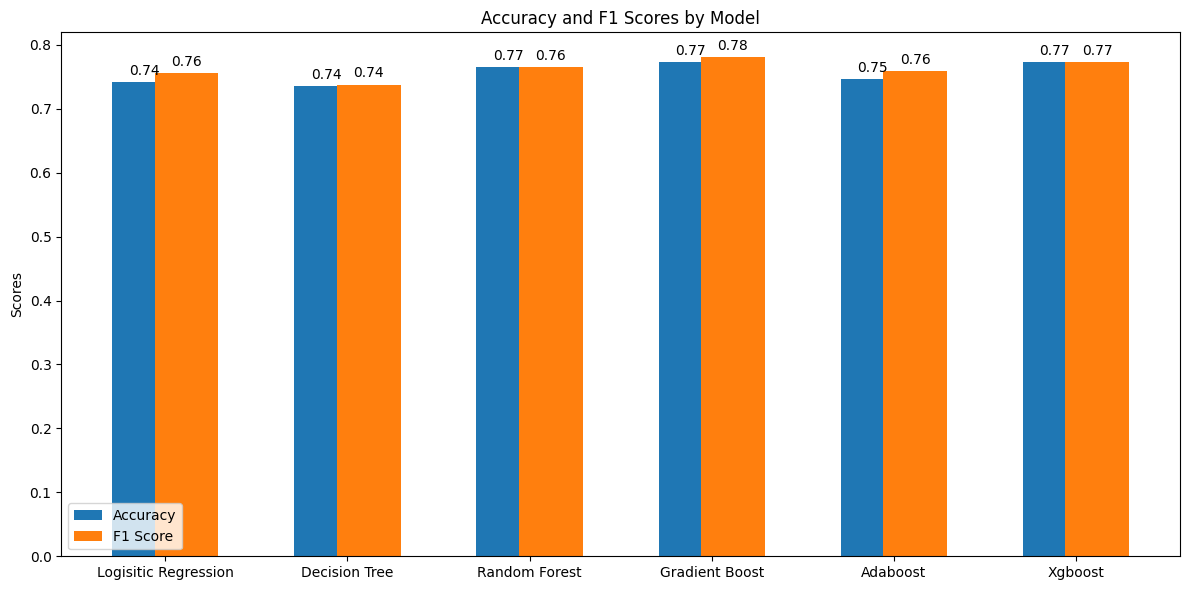

In [ ]:
model_names = list(models.keys())

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/3, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/3, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='{:.2f}')
ax.bar_label(rects2, padding=3, fmt='{:.2f}')

fig.tight_layout()

plt.show()